In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()

x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

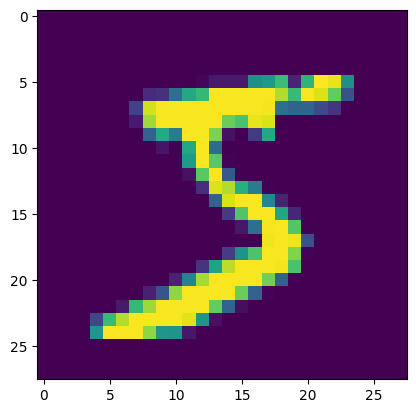

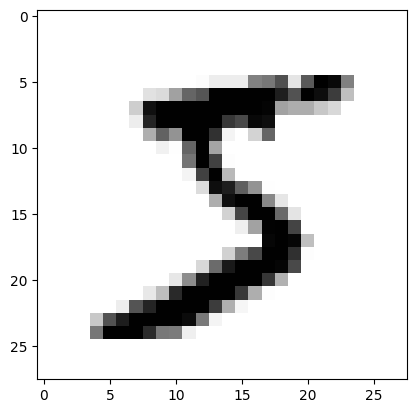

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

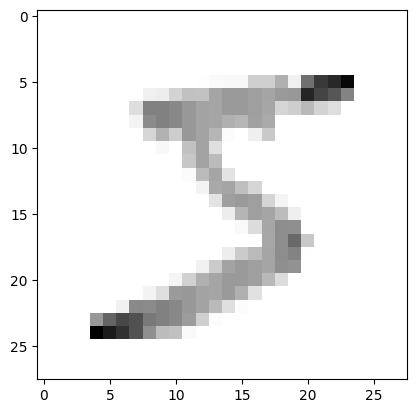

In [4]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [5]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
import numpy as np
img_size = 28
x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile model that we have created for handwritten digit recognition project
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 10 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 115s 341ms/step - accuracy: 0.8278 - loss: 0.5694 - val_accuracy: 0.9747 - val_loss: 0.0848
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 144s 350ms/step - accuracy: 0.9701 - loss: 0.1003 - val_accuracy: 0.9819 - val_loss: 0.0583
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 137s 336ms/step - accuracy: 0.9794 - loss: 0.0660 - val_accuracy: 0.9844 - val_loss: 0.0557
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 142s 335ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9856 - val_loss: 0.0483
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 142s 334ms/step - accuracy: 0.9869 - loss: 0.0398 - val_accuracy: 0.9869 - val_loss: 0.0435
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 142s 335ms/step - accuracy: 0.9884 - loss: 0.0349 - val_accuracy: 0.9884 - val_loss: 0.0415
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 145s 344ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9877 - val_loss: 0.0437
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 140s 338ms/step - accuracy: 0.9917 -

In [11]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9873 - loss: 0.0427
Test loss on 10,000 test samples 0.03631829097867012
Validation Accuracy on 10,000 samples 0.9896000027656555


  3/313 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


6


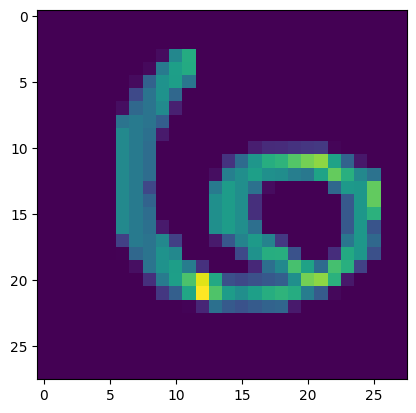

In [12]:
predictions = model.predict([x_tester])

print(np.argmax(predictions[54]))

plt.imshow(x_test[54])

In [16]:
import cv2

img = cv2.imread('/content/3.png')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3
